# <center>Assignment 5</center> 

Name : Viraj Patil

PRN  : 230940128038 

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv('chatbot_data_nlp.csv')
df = df.iloc[:,:3]
df

,response_id,class,response_text
0,response_1,not_flagged,I try and avoid this sort of conflict
1,response_2,flagged,Had a friend open up to me about his mental ad...
2,response_3,flagged,I saved a girl from suicide once. She was goin...
3,response_4,not_flagged,i cant think of one really...i think i may hav...
4,response_5,not_flagged,Only really one friend who doesn't fit into th...
...,...,...,...
75,response_76,not_flagged,"Now that I've been through it, although i'm no..."
76,response_77,flagged,when my best friends mom past away from od'ing...
77,response_78,not_flagged,As a camp counselor I provide stability in kid...
78,response_79,flagged,My now girlfriend used to have serious addicti...


In [3]:
df.set_index('response_id', inplace=True)

In [4]:
df['class'].value_counts()

class
not_flagged    55
flagged        25
Name: count, dtype: int64

<Axes: xlabel='count', ylabel='class'>

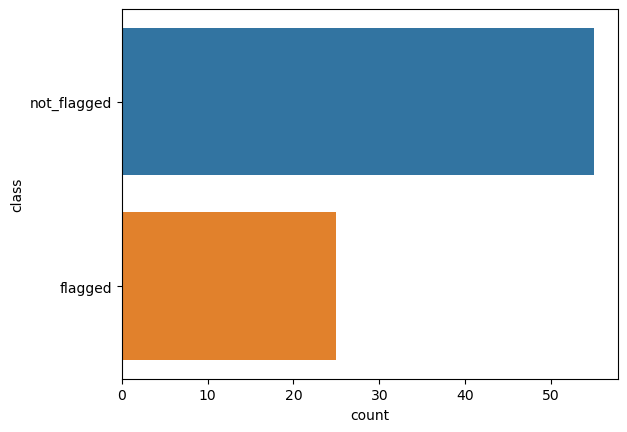

In [5]:
sns.countplot(y=df['class'])

#### Data Preparation

In [6]:
from nltk.tokenize import word_tokenize
from nltk.stem import LancasterStemmer
from nltk.corpus import stopwords
import string
from nltk.stem import WordNetLemmatizer
from nltk import pos_tag

In [7]:
wnl = WordNetLemmatizer()

In [8]:
def clean_text(text):
    tokens1 = word_tokenize(text)
    tokens2 = [x.lower() for x in tokens1 if x.isalpha() or x.isdigit()]
    tokens3 = [x for x in tokens2 if x not in stopwords.words('english')]
    tokens4 = []
    tags = pos_tag(tokens3)
    for word in tags:
        if word[1].startswith('N'):
            tokens4.append(wnl.lemmatize(word[0], pos='n'))
        if word[1].startswith('V'):
            tokens4.append(wnl.lemmatize(word[0], pos='v'))
        if word[1].startswith('R'):
            tokens4.append(wnl.lemmatize(word[0], pos='r'))
        if word[1].startswith('J'):
            tokens4.append(wnl.lemmatize(word[0], pos='a'))
    
    return tokens4
    
    

In [9]:
df['response_text'].apply(lambda x: clean_text(x))

response_id
response_1                          [try, avoid, sort, conflict]
response_2     [friend, open, mental, addiction, weed, take, ...
response_3     [save, girl, suicide, go, swallow, bunch, pill...
response_4              [cant, think, really, think, indirectly]
response_5     [really, friend, fit, category, therapist, cal...
                                     ...                        
response_76    [even, extremely, open, share, experience, oth...
response_77               [best, friend, mom, past, away, grade]
response_78    [camp, counselor, provide, stability, kid, lif...
response_79    [girlfriend, use, serious, addiction, trouble,...
response_80    [person, ever, talk, go, thing, talk, together...
Name: response_text, Length: 80, dtype: object

In [10]:
df

,class,response_text
response_id,,
response_1,not_flagged,I try and avoid this sort of conflict
response_2,flagged,Had a friend open up to me about his mental ad...
response_3,flagged,I saved a girl from suicide once. She was goin...
response_4,not_flagged,i cant think of one really...i think i may hav...
response_5,not_flagged,Only really one friend who doesn't fit into th...
...,...,...
response_76,not_flagged,"Now that I've been through it, although i'm no..."
response_77,flagged,when my best friends mom past away from od'ing...
response_78,not_flagged,As a camp counselor I provide stability in kid...


#### TF*IDF Vectorizer

In [11]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [12]:
tfidf = TfidfVectorizer(analyzer=clean_text)

In [13]:
x_vect = tfidf.fit_transform(df['response_text'])

In [14]:
x_vect

<80x447 sparse matrix of type '<class 'numpy.float64'>'
	with 921 stored elements in Compressed Sparse Row format>

In [15]:
tfidf.get_feature_names_out()

array(['able', 'absolutely', 'acquaintance', 'act', 'action', 'activity',
       'addiction', 'adequate', 'admit', 'advice', 'advise', 'age', 'ago',
       'agony', 'alcoholic', 'allow', 'almost', 'alone', 'already',
       'also', 'always', 'anniversary', 'answer', 'anxiety', 'anxious',
       'anyone', 'anything', 'anyway', 'appose', 'ask', 'asks',
       'attention', 'aunt', 'avoid', 'away', 'back', 'bad', 'basically',
       'bedroom', 'best', 'big', 'bit', 'blow', 'blue', 'blunt', 'book',
       'boyfriend', 'break', 'bring', 'brother', 'brought', 'bunch',
       'call', 'calm', 'camp', 'campsite', 'cancer', 'cant', 'car',
       'care', 'category', 'caught', 'cause', 'chance', 'change', 'chat',
       'circumstance', 'clean', 'cocaine', 'come', 'comfort', 'commit',
       'common', 'complete', 'completely', 'concern', 'confines',
       'conflict', 'convince', 'cop', 'cope', 'counselor', 'countless',
       'couple', 'crazy', 'cut', 'damn', 'date', 'day', 'deal', 'death',
       

In [16]:
y = df['class']

#### Cross validation

In [17]:
from sklearn.model_selection import train_test_split

In [18]:
x_train, x_test, y_train, y_test = train_test_split(x_vect, y, random_state= 0, stratify= y, test_size=0.25)

In [19]:
x_train.shape

(60, 447)

In [20]:
x_test.shape

(20, 447)

#### Build the model

In [21]:
from sklearn.ensemble import RandomForestClassifier

In [22]:
rf = RandomForestClassifier(n_estimators=10,max_depth=1, max_leaf_nodes=2)

In [23]:
rf.fit(x_train, y_train)

RandomForestClassifier(max_depth=1, max_leaf_nodes=2, n_estimators=10)

In [24]:
y_pred = rf.predict(x_test)
y_pred

array(['not_flagged', 'not_flagged', 'not_flagged', 'not_flagged',
       'not_flagged', 'not_flagged', 'not_flagged', 'not_flagged',
       'not_flagged', 'not_flagged', 'not_flagged', 'not_flagged',
       'not_flagged', 'not_flagged', 'not_flagged', 'not_flagged',
       'not_flagged', 'not_flagged', 'not_flagged', 'not_flagged'],
      dtype=object)

In [25]:
from sklearn.metrics import accuracy_score, ConfusionMatrixDisplay


acc = accuracy_score(y_test, y_pred)
acc

0.7

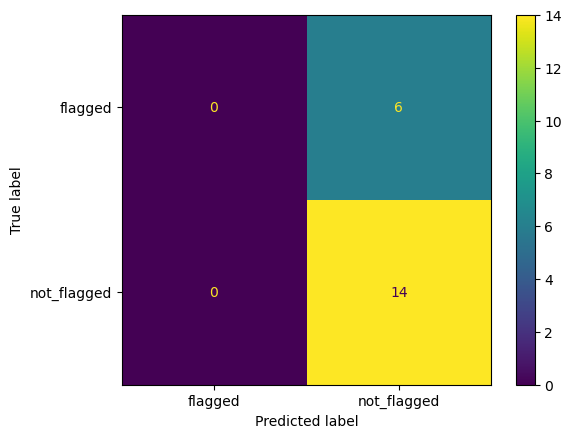

In [26]:
ConfusionMatrixDisplay.from_predictions(y_test, y_pred)

In [27]:
from sklearn.metrics import classification_report


print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

     flagged       0.00      0.00      0.00         6
 not_flagged       0.70      1.00      0.82        14

    accuracy                           0.70        20
   macro avg       0.35      0.50      0.41        20
weighted avg       0.49      0.70      0.58        20



In [28]:
df = pd.read_csv('ecommerceDatasetNLP.csv', header=None, names=['class','text'])
df

,class,text
0,Household,Paper Plane Design Framed Wall Hanging Motivat...
1,Household,"SAF 'Floral' Framed Painting (Wood, 30 inch x ..."
2,Household,SAF 'UV Textured Modern Art Print Framed' Pain...
3,Household,"SAF Flower Print Framed Painting (Synthetic, 1..."
4,Household,Incredible Gifts India Wooden Happy Birthday U...
...,...,...
50420,Electronics,Strontium MicroSD Class 10 8GB Memory Card (Bl...
50421,Electronics,CrossBeats Wave Waterproof Bluetooth Wireless ...
50422,Electronics,Karbonn Titanium Wind W4 (White) Karbonn Titan...
50423,Electronics,"Samsung Guru FM Plus (SM-B110E/D, Black) Colou..."


In [29]:
df['class'].value_counts()

class
Household                 19313
Books                     11820
Electronics               10621
Clothing & Accessories     8671
Name: count, dtype: int64

<Axes: xlabel='count', ylabel='class'>

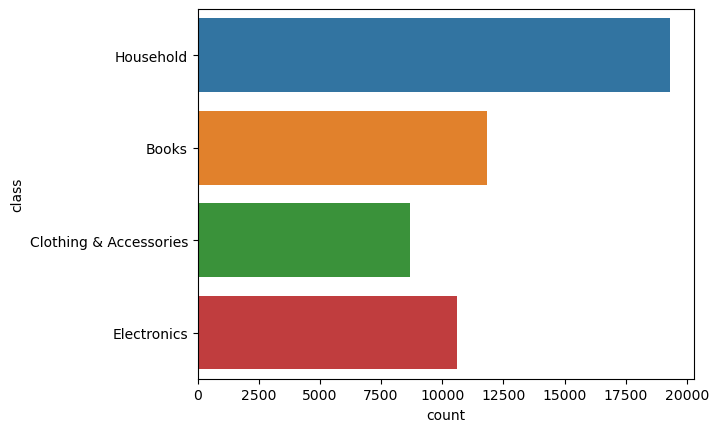

In [30]:
sns.countplot(y=df['class'])

In [31]:
df.isnull().sum()

class    0
text     1
dtype: int64

In [32]:
df.dropna(inplace=True)
df.isnull().sum()

class    0
text     0
dtype: int64

In [33]:
df['text'].apply(lambda x: clean_text(x))

0        [paper, plane, design, frame, wall, hang, moti...
1        [saf, frame, paint, wood, inch, x, inch, speci...
2        [saf, textured, modern, art, print, frame, pai...
3        [saf, flower, print, frame, paint, synthetic, ...
4        [incredible, gift, india, wooden, happy, birth...
                               ...                        
50420    [strontium, microsd, class, memory, card, blac...
50421    [crossbeats, wave, waterproof, bluetooth, wire...
50422    [karbonn, titanium, white, karbonn, titanium, ...
50423    [samsung, guru, fm, black, colour, black, comp...
50424                       [micromax, canvas, win, white]
Name: text, Length: 50424, dtype: object

In [34]:
y = df['class']

In [35]:
x_vect = tfidf.fit_transform(df['text'])

In [36]:
x_train, x_test, y_train, y_test = train_test_split(x_vect, y, random_state= 0, stratify= y, test_size=0.25)

In [37]:
x_train.shape, x_test.shape

((37818, 53309), (12606, 53309))

In [38]:
rf.fit(x_train, y_train)

RandomForestClassifier(max_depth=1, max_leaf_nodes=2, n_estimators=10)

In [39]:
y_pred = rf.predict(x_test)
y_pred

array(['Household', 'Household', 'Household', ..., 'Household',
       'Household', 'Household'], dtype=object)

In [40]:
acc = accuracy_score(y_test, y_pred)
acc

0.3942567031572267

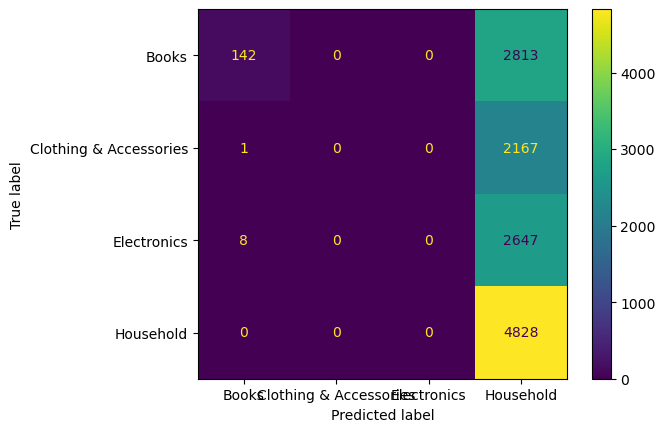

In [41]:
ConfusionMatrixDisplay.from_predictions(y_test, y_pred)

In [42]:
print(classification_report(y_test, y_pred))

                        precision    recall  f1-score   support

                 Books       0.94      0.05      0.09      2955
Clothing & Accessories       0.00      0.00      0.00      2168
           Electronics       0.00      0.00      0.00      2655
             Household       0.39      1.00      0.56      4828

              accuracy                           0.39     12606
             macro avg       0.33      0.26      0.16     12606
          weighted avg       0.37      0.39      0.24     12606

